# Creating a Filter, Edge Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
%matplotlib inline
image = cv2.cvtColor(cv2.imread("data/basetis.jpg"), cv2.COLOR_BGR2RGB)

print("Type", type(image), " size:", image.shape)

Type <class 'numpy.ndarray'>  size: (2432, 3286, 3)


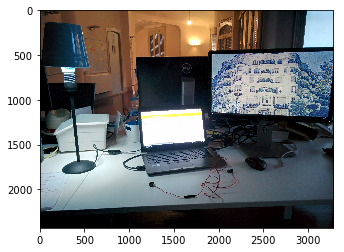

In [3]:
plt.imshow(image)

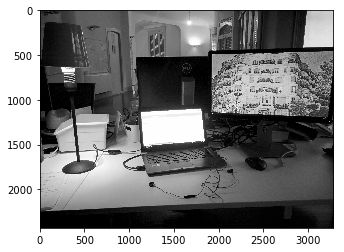

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")

### Filter vertical edges

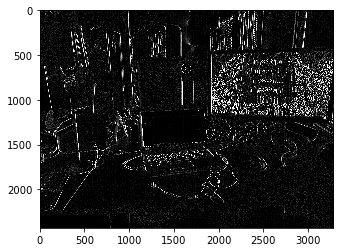

In [5]:
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

kernel_4 = np.array([[-1, 0, 0, 1],
                    [-2, 0, 0, 2],
                    [-2, 0, 0, 2],
                    [-1, 0, 0, 1]])

kernel_5 = np.array([[-1, 0, 0, 0, 1],
                    [-2, 0, 0, 0, 2],
                    [-2, 0, 0, 0, 2],
                    [-2, 0, 0, 0, 2],
                    [-1, 0, 0, 0, 1]])

#filtered = cv2.filter2D(gray, -1, sobel_x)
filtered = cv2.filter2D(gray, -1, kernel_5)
plt.imshow(filtered, cmap="gray")

### Create binary image

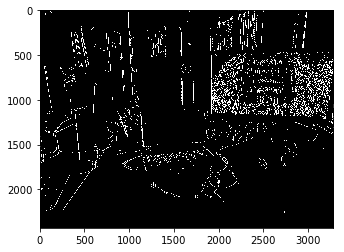

In [6]:
retval, binary_image = cv2.threshold(filtered, 100, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap="gray")

### Gaussian blur the image

In [7]:
g_blur = cv2.GaussianBlur(gray, (5,5), 0)

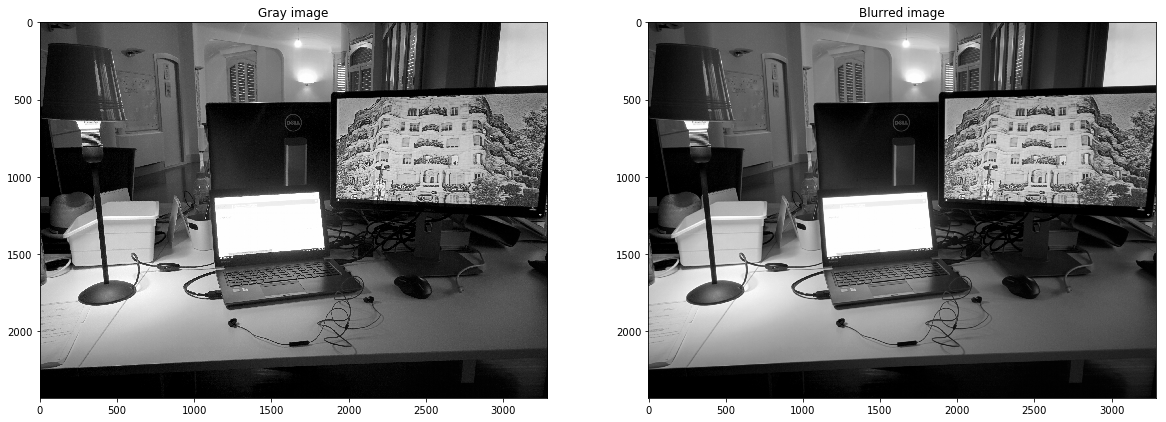

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title("Gray image")
ax1.imshow(gray, cmap="gray")

ax2.set_title("Blurred image")
ax2.imshow(g_blur, cmap="gray")

In [9]:
b_filtered = cv2.filter2D(g_blur, -1, kernel_5)

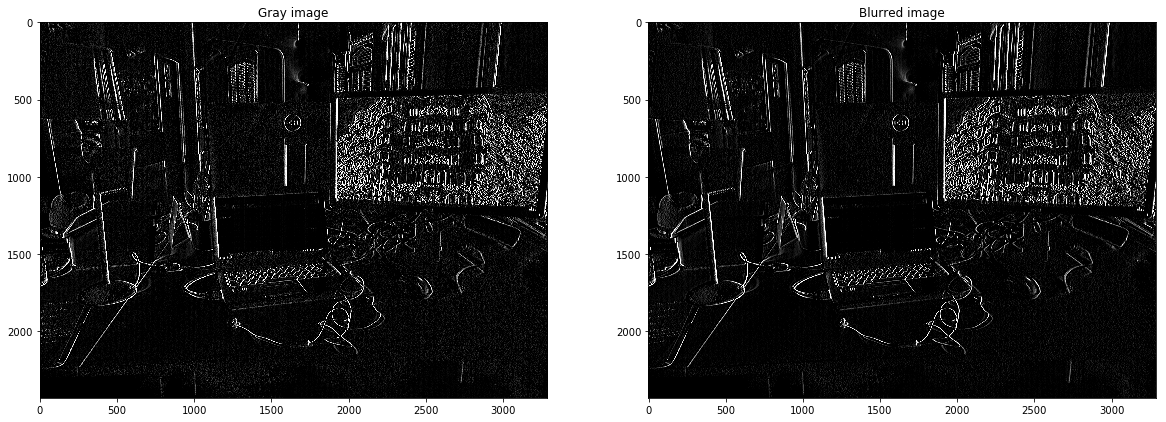

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title("Gray image")
ax1.imshow(filtered, cmap="gray")

ax2.set_title("Blurred image")
ax2.imshow(b_filtered, cmap="gray")

### Canny edge detection

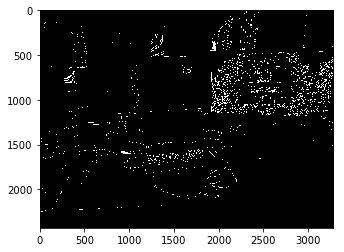

In [11]:
lower = 120
upper = 240

edges = cv2.Canny(gray, lower, upper)

plt.imshow(edges, cmap="gray")

In [12]:
wide = cv2.Canny(gray, 30, 100)
tight = cv2.Canny(gray, 180, 240)

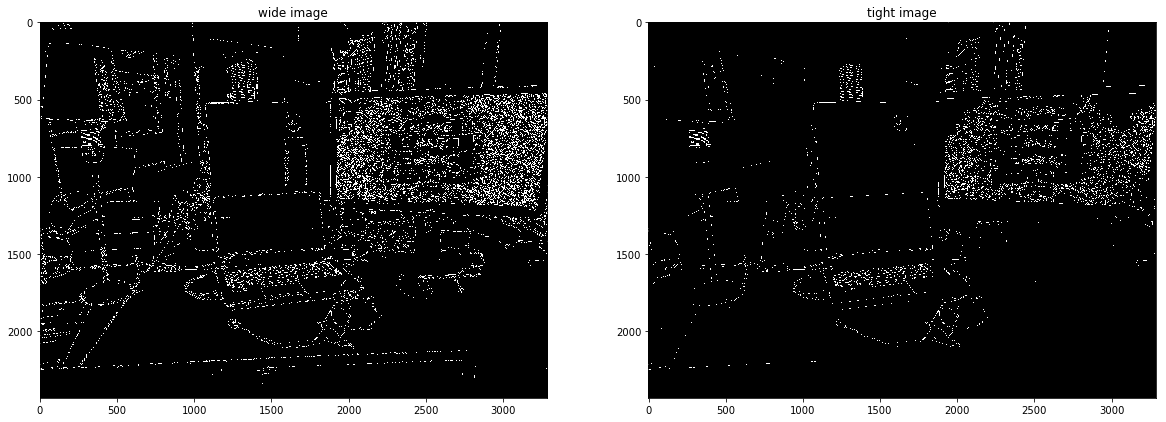

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title("wide image")
ax1.imshow(wide, cmap="gray")

ax2.set_title("tight image")
ax2.imshow(tight, cmap="gray")

### Try with resized image

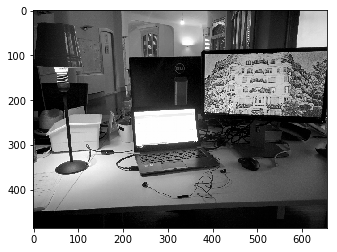

In [16]:
small = cv2.resize(gray, (0,0), fx=0.2, fy=0.2)
plt.imshow(small, cmap="gray")

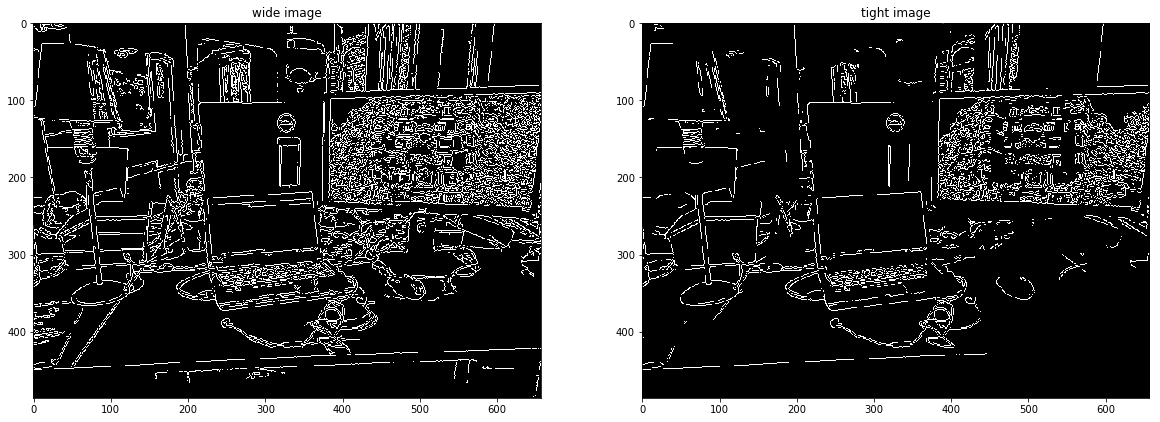

In [17]:
wide = cv2.Canny(small, 30, 100)
tight = cv2.Canny(small, 180, 240)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title("wide image")
ax1.imshow(wide, cmap="gray")

ax2.set_title("tight image")
ax2.imshow(tight, cmap="gray")